In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
%matplotlib inline
import numpy as np
import pylab as plt
import pandas as pd
from scipy.io import loadmat
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [3]:
cd drive/My\ Drive

/content/drive/My Drive


In [4]:
"""Load data"""
from glob import glob
files = glob('datasets/*.mat')

all_data = {}

for i,add in enumerate(files):
    file_name = add.split('/')[-1][:-4]
    d1 = loadmat(add)
    d2 = list(d1.values())[3]
    all_data[file_name] = d2

trend_tem = all_data['data_trend_tem']
del all_data['data_trend_tem']
keys = all_data.keys()

In [5]:
cols = ['Power','Input DG','Output Temp','Output Press','Fuel Debi','TIT','TET']


In [6]:
n_data = trend_tem.shape[1]
p1, p2, p3 = 5*n_data//10, 7*n_data//10, 10*n_data//10

p1 = p1//5
p2 = p2//5
p3 = p3//5

n_window = 1

x_train = []
y_train = []
x_valid = []
y_valid = []
x_test = []
y_test = []

for i,key in enumerate(keys):
    x = all_data[key]
    x = np.concatenate([x,trend_tem.T],axis=1)
    
    x = np.concatenate([x[i:n_data-(n_window-i-1)] for i in range(n_window)],axis=1) 
    y = np.zeros(n_data)+i
    y = y[n_window-1:]
    
    x_train.append(x[:p1])
    y_train.append(y[:p1])
    
    x_valid.append(x[p1:p2])
    y_valid.append(y[p1:p2])
    
    x_test.append(x[p2:p3])
    y_test.append(y[p2:p3])
    
x_train = np.array(x_train)
y_train = np.array(y_train)
x_valid = np.array(x_valid)
y_valid = np.array(y_valid)
x_test = np.array(x_test)  
y_test = np.array(y_test)

In [7]:
n_f = x_train.shape[-1]
x_train = x_train.reshape(-1,n_f)
y_train = y_train.reshape(-1)
x_valid = x_valid.reshape(-1,n_f)
y_valid = y_valid.reshape(-1)
x_test = x_test.reshape(-1,n_f) 
y_test = y_test.reshape(-1)

print(x_train.shape,y_train.shape,x_valid.shape,y_valid.shape,x_test.shape,y_test.shape)

(1451520, 8) (1451520,) (580608, 8) (580608,) (870912, 8) (870912,)


In [ ]:
# np.random.shuffle(x_train)
# np.random.shuffle(y_train)
# np.random.shuffle(x_valid)
# np.random.shuffle(y_valid)

## KNN

In [8]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

Model = KNeighborsClassifier()
Model.fit(x_train, y_train)

y_pred = Model.predict(x_valid)

# Accuracy score
print('accuracy is',accuracy_score(y_pred,y_valid))


accuracy is 0.41780788414903


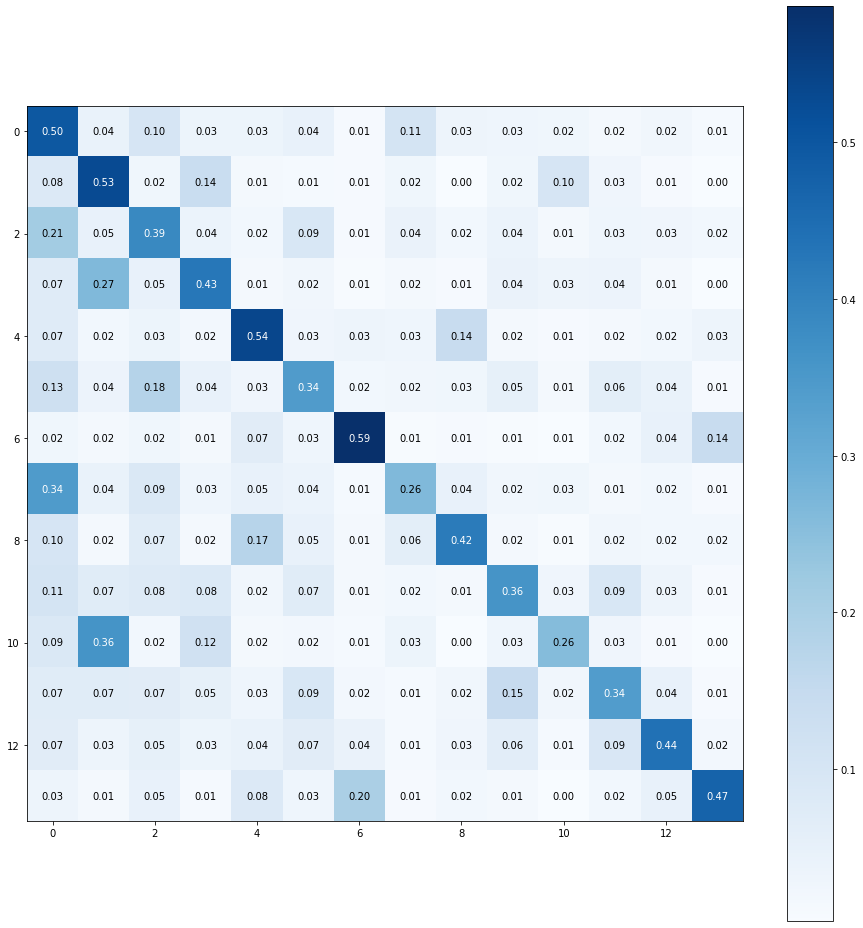

In [11]:
plot_confusion_matrix(y_valid, y_pred, classes=[cols],title='Confusion matrix', normalize=True)
# plt.savefig('CM KNN for train half of all data and 20% validation.png')

## RFC

In [25]:
#@title Default title text
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(x_train, y_train)
yPred = model.predict(x_valid)

print('accuracy of test is = ' ,accuracy_score(yPred, y_valid))

accuracy of test is =  0.7225821897045855


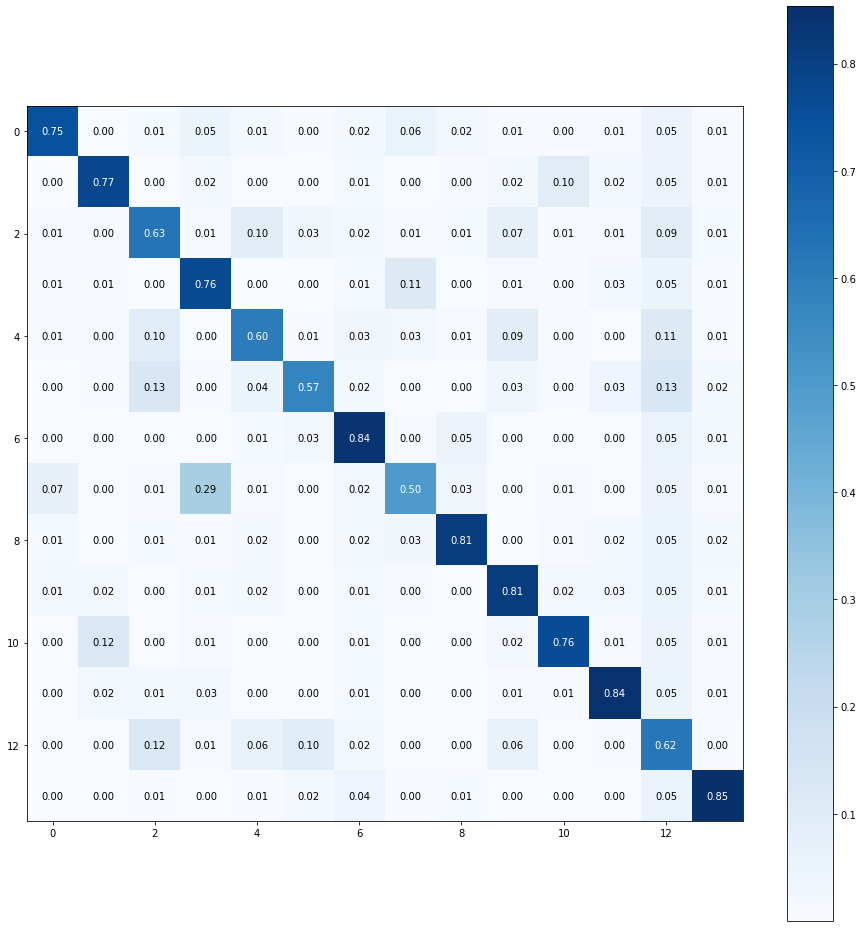

In [26]:
plot_confusion_matrix(y_valid, yPred, classes=[cols],title='Confusion matrix', normalize=True)
# plt.savefig('foo.png')

## Gaussian NB

In [12]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(x_train, y_train)
yPred = model.predict(x_valid)

print('accuracy of test is = ',accuracy_score(yPred, y_valid))

accuracy of test is =  0.07063802083333333


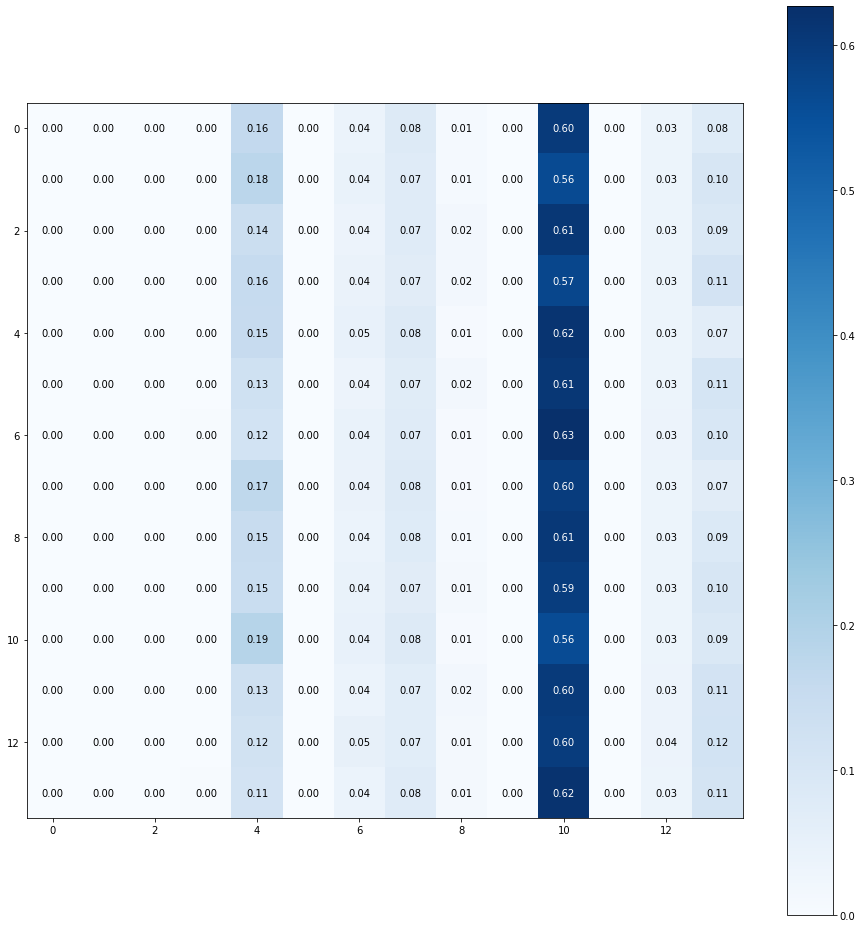

In [13]:
plot_confusion_matrix(y_valid, yPred, classes=[cols],title='Confusion matrix', normalize=True)
# plt.savefig('CM GNB for train half of all data and 20% validation.png')

## Linear LogisticRegression

In [22]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train, y_train)
yPred = model.predict(x_valid)


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [23]:
print('accuracy of test is = ',accuracy_score(yPred, y_valid))

accuracy of test is =  0.07062424217372135


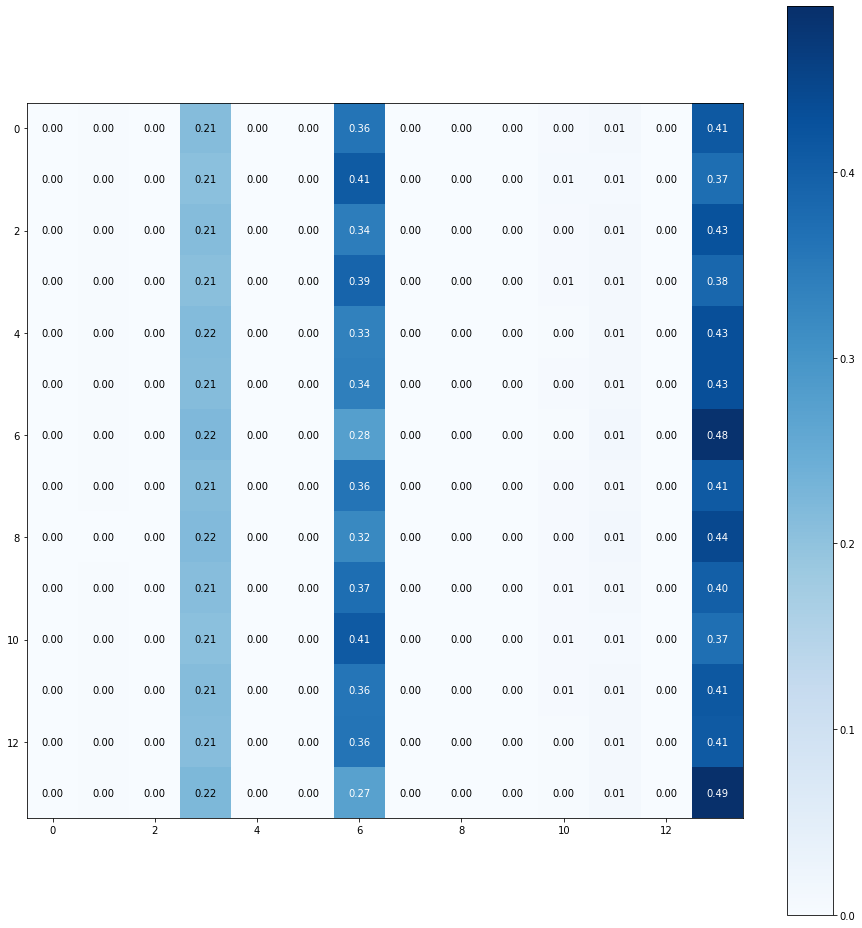

In [24]:
plot_confusion_matrix(y_valid, yPred, classes=[cols],title='Confusion matrix', normalize=True)
# plt.savefig('CM LinearLR for train half of all data and 20% validation.png')


# Cross-Validation

In [ ]:
from sklearn.model_selection import cross_val_score
model = RandomForestClassifier()
cross_val_score(model, X, y, cv=5)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when

array([0.68428864, 0.68435682, 0.68346136, 0.68469091, 0.68495682])

# After Feature selection

In [ ]:
X = dataTrain.filter(['TET', 'temp', 'Power', 'Output Temp', 'Fuel Debi', 'TIT', 'Input DG'], axis=1)
y = dataTrain.filter(['status'])

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.5 )

In [ ]:
Model = KNeighborsClassifier()
Model.fit(X_train, y_train)
y_pred = Model.predict(X_test)

print('accuracy of test is = ',accuracy_score(y_pred, y_test))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


accuracy of test is =  0.40934545454545457


In [10]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
#     classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
#         print("Normalized confusion matrix")
#     else:
#         print('Confusion matrix, without normalization')

#     print(cm)

    fig, ax = plt.subplots(figsize=(13,13))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
#     ax.set(xticks=np.arange(cm.shape[1]),
#            yticks=np.arange(cm.shape[0]),
#            # ... and label them with the respective list entries
#            xticklabels=classes, yticklabels=classes,
#            title=title,
#            ylabel='True label',
#            xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
#     plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
#              rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax